# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 4б

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **3 апреля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
import math

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'


#Теоретическая часть

Бутстреп:

1. 5 баллов Пусть $X_1, ..., X_n$  &mdash; некоторая выборка и $X_1^*, ..., X_n^*$ --- построенная по ней бутстрепная выборка. С какой вероятностью элемент $X_i$ исходной выборки попадет в бутстрепную выборку? К чему стремится эта вероятность с ростом размера выборки? Посчитайте среднее число уникальных элементов в бутстрепной выборке, если в исходной выборке все наблюдения различны.
	
2. \* (**бонус**, на подумать, доп баллы) Пусть $X_1, ..., X_n$ &mdash; выборка из равномерного распределения на отрезке $[0, \theta]$ и

 $\widehat{\theta}~=~X_{(n)}$ &mdash; оценка параметра $\theta$. Имеет ли смысл применять метод бутстрепа для оценки распределения $\widehat{\theta}$?

**Ответ:**

1)

Полное количество выборок с повтороением $A = n^n$ по правилу умножения. Посчитаем количесвто выборок, которые не содержат $X_i$. Для этого нам надо строить выборки по n элементов из n-1 вариантов $(X_1, X_2,..., X_{i-1}, X_{i+1},...,X_n)$. Таких выборок всего $B = (n-1)^n$. Вероятность встретить элемент $X_i$ в выборке + вероятность не встретить дадут 1. А значит, что вероятность встретить $P = 1 - B/A = 1 - \left( \frac{n-1}{n}  \right) ^n = 1 - \left( 1 - \frac1n  \right)^n$

Переходя к пределу: $P_{\infty} = 1 - \lim\limits_{n \to \infty} \left( 1 - \frac1n  \right)^n = 1 - \frac1e$. Что приблизительно равно 63,2%.

Среднее количество уникальных элементов: $\lfloor n (1 - (1-\frac1n)^n) \rfloor$

2)

Я думаю, что метод бутстрепа тут ненужен, он сделает только хуже. Если у нас оценка $\widehat{\theta}~=~X_{(n)}$, то она всегда заведомо меньше параметра $\theta$. При генерации бустрепной выборки всегда есть вероятность, что $X_{(n)}$ в нее не попадет (посчитана в 1 пункте). Это значит, что максимальный элемент может в нее не попасть и в этой бутстреной выборке будет другой максимальный элемент $X_{(n-1)} < X_{(n)}$. Поэтому оценка по этой бутстрепной выборке будет еще более занижена, чем по исходной выборке. 

Проверка гипотез:


5 баллов Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(\theta,1)$. Постройте РНМК уровня значимости $\alpha$ проверки

  a). $\mathrm{H}_0\colon \theta\geqslant\theta_0\ vs.\ \mathrm{H}_1\colon \theta<\theta_0$; 

  b). $\mathrm{H}_0\colon \theta\leqslant\theta_0\ vs.\ \mathrm{H}_1\colon \theta>\theta_0$.

	В каждом случае найдите мощность критерия.  Квантили и мощности критерия также необходимо записать в виде строки кода на `scipy`.

4. 5 баллов Кот Василий (на фото слева) решил вывести правило, по которому можно отличать песиков от единорогов. Известно, что рост песиков имеет распределение $\Gamma(6/7, 2)$, а рост единорогов &mdash; распределение $\Gamma(5/44, 3)$. На основе роста животного $X$, кот Василий построил наиболее мощные критерии для проверки гипотез песик vs. единорог и единорог vs. песик. Какой ответ получит кот Василий для существа (на фото справа), рост которого составляет 6.66? Каковы мощности критериев? В ответе должно быть число. Квантили и мощности критерия также необходимо записать в виде строки кода на `scipy`.

 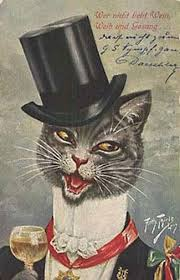
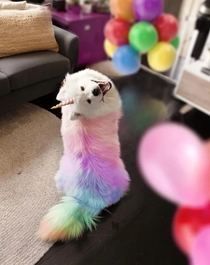


**Ответ:**

3) 

Построим функцию максимального правдоподобия для нормального распределения:

$ L_X (\theta) = \frac{1}{(2 \pi)^{\frac{n}{2}}} exp \left(-\frac12 \sum\limits_{i=1}^n (x_i - \theta) ^2\right)$

Запишем отношение правдоподобия:

$\Lambda = \frac{L_X (\theta_1)}{L_X (\theta_2)} = exp \left( -\frac12 \left( \sum\limits_{i=1}^n (x_i - \theta_1) ^2 - \sum\limits_{i=1}^n (x_i - \theta_2) ^2 \right) \right) = exp \left( \frac12 \left(n (\theta_1^2 - \theta_2^2) - 2 n \overline{X} (\theta_1 - \theta_2) \right) \right)$

а)

$\Lambda (T (X)); T (X) = \sum\limits_{i=1}^n (x_i)$. Отношение правдоподобие как функция $f_{\theta_1, \theta_2} (T)$ от статистики  монотонно возрастает.

Значит, $S = \{ \sum\limits_{i=1}^n (x_i) < c_{\alpha} \}$ является равномерно наиболее мощным критерием, где $P_{\theta_0} (\sum\limits_{i=1}^n (x_i) < c_{\alpha}) = \alpha$

$c_{\alpha} = \mathcal{N (n \theta_0, n)}_{\alpha} =  z_{\alpha}$ ($\alpha$ квантильно такого нормального распределения)

`c_a = sps.norm(loc=n*theta0, scale=n).ppf(a)`

Мощность критерия:

`beta = sps.norm(loc=n*theta, scale=n).sf(c_a)`, $\theta < \theta_0$

б)

Отношение правдоподобия такое же, но надо изменить знак в критерии:

$S = \{ \sum\limits_{i=1}^n (x_i) > c_{\alpha} \}$

$P_{\theta_0} (\sum\limits_{i=1}^n (x_i) > c_{\alpha}) = \alpha$

$c_{\alpha} = 1 - \mathcal{N (n \theta_0, n)}_{\alpha} = 1 - z_{\alpha}$ ($\alpha$ квантильно такого нормального распределения)

`z_a = sps.norm(loc=n*theta0, scale=n).ppf(a)`

Мощность критерия:

`beta = sps.norm(loc=n*theta, scale=n).sf(c_a)`

4)

$p = \frac{x^{\beta-1} \alpha^{\beta}}{\Gamma (\beta)} exp(-\alpha x)$

а) Гипотеза: $H_0: p_1 = \Gamma(\frac67, 2)$ vs альтернатива: $H_1: p_2 = \Gamma(\frac{5}{44}, 3)$

Отншение правдоподобия: $\Lambda = \frac{L(\alpha_2, \beta_2)}{L(\alpha_1, \beta_1)} = \frac{\alpha_2^{\beta_2}}{\alpha_1^{\beta_1}} \cdot \frac{\Gamma (\beta_1)}{\Gamma (\beta_2)} \cdot exp((\alpha_1 - \alpha_2) x) \cdot x^{\beta_2 - \beta_1}$

По лемме НП:

$S = \{ \Lambda(X) > c_{\alpha} \}$, где $P_{\alpha_1, \beta_1} (\Lambda(X) > c_{\alpha}) = \alpha$

Функция от выборки монотонно возрастает (от одного эл-та). Значит можно преобразовать критерий и получить : $x > k_{\alpha}$ - квантиль $(1-\alpha)$ уровня гамма распределения с параметрами $(\alpha_1, \beta_1)$

`k_a = sps.gamma(scale = 7/6, a = 2). ppf(0.95) = 5.53`

Тогда $S = \{x > 5.53\}$. $x_0 = 6.66$ => $H_0$ не отвергаем => не пес

Поменяем местами гипотезу и альтернативу:

б) Начинается оч похоже, только отношение правдоподобия наоброт убывает. Значит можно преобразовать критерий.и получить $x < k_{\alpha}$ - квантиль $(\alpha)$ уровня гамма распределения с параметрами $(\alpha_2, \beta_2)$

`k_a = sps.gamma(scale = 44/5, a = 3). ppf(0.05) = 7.20`

Тогда $S = \{x < 7.20\}$. $x_0 = 6.66$ => $H_0$ не отвергаем => не единорог


Очень странная зверушка,
До чего смешные ушки,
Симпатичная мордашка,
Кто-же это?

А мы не знаем, кто это, мы отвергли обе теории (не пес и не единорог). Наши критерии не могут сказать, кто это. 

# Практическая часть


### Задача 5. 

15 баллов

Часто в физике и биологии встречаются выборки малого размера. В этом случае асимптотический доверительный интервал может давать не очень корректный ответ. Можно воспользоваться обычными доверительными интервалами или бутстрепом. Иногда обычные доверительные интервалы мы строить не умеем.

Посмотрим, насколько хорошо работают эти методы на маленькой выборке.


**1).** Рассмотрим модель $X_1, \ldots X_n \sim Exp(\theta)$.

Как мы знаем из теоретической части, эта модель хорошо описывает данные о разнице между соседними событиями, такими как появление фотона на детекторе или поломки различных систем.

В качестве оценки $\widehat \theta$ будем рассматривать $\frac{1}{\overline X}$.

Выпишите формулы для 

- а). Точного доверительного интервала для $\theta$;

- б). Асимптотического доверительного интервала для $\theta$;

  *Лайфхак: $Exp(\theta) = Gamma(\theta, 1)$, далее см. теор. дз.*

- в) Нормального бутстрепного интервала с использованием $\widehat \theta$;

- г) Центрального бутстрепного интервала с использованием $\widehat \theta$;

- д) Квантильного бутстрепного интервала с использованием $\widehat \theta$.



Ответ:

а)  $\left(  \frac{\Gamma_{\frac{1-\alpha}{2}}}{n \overline{X_n}};  \frac{\Gamma_{\frac{1+\alpha}{2}}}{n \overline{X_n}} \right)$, где $\Gamma_p$ - p квантиль $\Gamma (n, 1)$ распределения

б) $\left(\frac{\frac{z_{\frac{1-\alpha}{2}}}{\sqrt{n}} + 1}{\overline{X_n}}; \frac{\frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}} + 1}{\overline{X_n}} \right)$, где $z_p$ - p квантиль стандартного нормального распределения

в) $\left(  \frac{1}{\overline{X}} - z_{\frac{1+\alpha}{2}} \sqrt{\hat{v_{boot}}}; \frac{1}{\overline{X}} + z_{\frac{1+\alpha}{2}} \sqrt{\hat{v_{boot}}} \right)$

г) $\left(  2 \frac{1}{\overline{X}} - \theta^*_{(\lceil B (1 + \alpha)/2   \rceil)}; 2 \frac{1}{\overline{X}} - \theta^*_{(\lfloor B (1 - \alpha)/2   \rfloor)} \right)$

д) $\left(  \theta^*_{(\lfloor B (1 - \alpha)/2   \rfloor)};  \theta^*_{(\lceil B (1 + \alpha)/2   \rceil)}  \right)$


Реализуйте функцию вычисления выборки оценок $\theta^*_1, \ldots \theta^*_B$ для оценки $\widehat \theta$ методом бутстрепа. Функция должна принимать на вход выборку, количество бутстрепных выборок $B$ и может принимать дополнительные параметры для вашего удобства. 

In [2]:
def bootstrap(sample: np.ndarray, B=6) -> np.ndarray:
    
    '''Возвращает выборку оценок размера B'''
    
    sample_of_thetas = np.zeros(B)
    
    for i in range(B):
        ind = sps.randint(low=0, high=sample.size).rvs(size = sample.size)
        bootstrap_array = sample[ind]
        sample_of_thetas[i] = 1/np.mean(bootstrap_array)
        
        
    return sample_of_thetas

In [3]:
test_a = np.array([1, 2, 3])
bst = bootstrap(test_a)
print(bst)

[0.6        0.5        0.5        0.42857143 1.         0.5       ]


Реализуйте вышеупомянутые доверительные интервалы в виде функций, принимающих на вход выборку и  выборку оценок, полученных с помощью бутстрепа. Функции могут принимать дополнительные параметры для вашего удобства. Реализовывать вычисление бутстрепных интервалов для подвыборок размера от 1 до n не нужно, только для всей выборки. Обычный и асимптотический доверительный интервалы лучше также реализовать для всех подвыборок размера от 1 до n, как в предыдущем задании, так как это понадобится дальше.


В данной задаче полагайте $\alpha = 0.9$ (для наглядности).

Сгенерируйте реализации выборки из  $Exp(5)$ размеров 5 и  100 и выведите реализации вышеупомянутых доверительных интервалов для этих двух реализаций. Сделайте **выводы**.

*Обратите внимание на то, как задаются параметры экспоненциального распределеня в `scipy`.*

In [4]:
def exact_confidence_interval(sample: np.ndarray, a: float) -> np.ndarray:
    
    #returns 2D np.ndarray
    grid = np.arange(1, sample.size+1)
    cum_mean = np.cumsum(sample)/grid
    
        
    g_left = np.array([sps.gamma.ppf(q=(0.5-a/2),a=i) for i in range(1, sample.size+1)])
    g_right = np.array([sps.gamma.ppf(q=(0.5+a/2),a=i) for i in range(1, sample.size+1)])
    
    left = g_left / (grid*cum_mean)
    right = g_right / (grid*cum_mean)
    
    
    return np.array(list(zip(left, right)))
    

def asymptotic_confidence_interval(sample: np.ndarray, a: float) -> np.ndarray:
    
    #returns 2D np.ndarray
    grid = np.arange(1, sample.size+1)
    cum_mean = np.cumsum(sample)/grid
    
    z = sps.norm.ppf(0.5+a/2)
    
    left = (1-z/(grid**0.5))/cum_mean
    right = (1+z/(grid**0.5))/cum_mean
    
    
    return np.array(list(zip(left, right)))

def normal_bootstrap_interval(sample: np.ndarray, a: float, sample_of_thetas: np.ndarray) -> np.ndarray:
    return np.array([1/np.mean(sample) - sps.norm.ppf(0.5+a/2) * (np.var(sample_of_thetas))**0.5,
            1/np.mean(sample) + sps.norm.ppf(0.5+a/2) * (np.var(sample_of_thetas))**0.5])

def central_bootstrap_interval(sample: np.ndarray, a: float, sample_of_thetas: np.ndarray) -> np.ndarray:
    B = sample_of_thetas.size



    return np.array([2/np.mean(sample) - np.quantile(sample_of_thetas, math.ceil(B*(1+a)/2)/B),
            2/np.mean(sample) - np.quantile(sample_of_thetas, math.floor(B*(1-a)/2)/B)])


def quantile_bootstrap_interval(sample: np.ndarray, a: float, sample_of_thetas: np.ndarray) -> np.ndarray:
    
    #в этой функции аргумент sample не нужен, но я умышленно его оставляю для удобства использования
    B = sample_of_thetas.size
    return np.array([np.quantile(sample_of_thetas, math.floor(B*(1-a)/2)/B), 
                     np.quantile(sample_of_thetas, math.ceil(B*(1+a)/2)/B)])



In [5]:
# генерирую выборки
sample5 = sps.expon.rvs(size=5, scale=1/5)
sample100 = sps.expon.rvs(size=100, scale=1/5)


a=0.9

# бутстрепные оценки
sample_of_thetas5 = bootstrap(sample5)
sample_of_thetas100 = bootstrap(sample100, B=100)

# реализации ДИ для выборки размера 5
exact_confidence_interval5 = exact_confidence_interval(sample5, a)
asymptotic_confidence_interval5 = asymptotic_confidence_interval(sample5, a)
normal_bootstrap_interval5 = normal_bootstrap_interval(sample5, a, sample_of_thetas5)
central_bootstrap_interval5 = central_bootstrap_interval(sample5, a, sample_of_thetas5)
quantile_bootstrap_interval5 = quantile_bootstrap_interval(sample5, a, sample_of_thetas5)

# реализации ДИ для выборки размера 100
exact_confidence_interval100 = exact_confidence_interval(sample100, a)
asymptotic_confidence_interval100 = asymptotic_confidence_interval(sample100, a)
normal_bootstrap_interval100 = normal_bootstrap_interval(sample100, a, sample_of_thetas100)
central_bootstrap_interval100 = central_bootstrap_interval(sample100, a, sample_of_thetas100)
quantile_bootstrap_interval100 = quantile_bootstrap_interval(sample100, a, sample_of_thetas100)

# print(np.sort(sample_of_thetas100))


# print(1/np.mean(sample5))
# print(1/np.mean(sample100))
# print(exact_confidence_interval100[-1], asymptotic_confidence_interval100[-1], 
#       normal_bootstrap_interval100, central_bootstrap_interval100, quantile_bootstrap_interval100)

print(f'Для выборки размера 5 и бутстрепной выборки размера 6 оценка будет {np.round(1/np.mean(sample5), 3)}\
\nТочный ДИ: {np.round(exact_confidence_interval5[-1], 3)}\
\nАсимптотический ДИ:{np.round(asymptotic_confidence_interval5[-1], 3)}\
\nНормальный бутстрепный интервал: {np.round(normal_bootstrap_interval5, 3)}\
\nЦентральный бутстрепный интервал: {np.round(central_bootstrap_interval5, 3)}\
\nКвантильный бутстрепный интервал: {np.round(quantile_bootstrap_interval5, 3)}')

print('====================================================')

print(f'Для выборки размера 100 и бутстрепной выборки размера 6 оценка будет {np.round(1/np.mean(sample100), 3)}\
\nТочный ДИ: {np.round(exact_confidence_interval100[-1], 3)}\
\nАсимптотический ДИ:{np.round(asymptotic_confidence_interval100[-1], 3)}\
\nНормальный бутстрепный интервал: {np.round(normal_bootstrap_interval100, 3)}\
\nЦентральный бутстрепный интервал: {np.round(central_bootstrap_interval100, 3)}\
\nКвантильный бутстрепный интервал: {np.round(quantile_bootstrap_interval100, 3)}')


Для выборки размера 5 и бутстрепной выборки размера 6 оценка будет 6.817
Точный ДИ: [ 2.686 12.48 ]
Асимптотический ДИ:[ 1.802 11.831]
Нормальный бутстрепный интервал: [4.869 8.765]
Центральный бутстрепный интервал: [5.138 8.331]
Квантильный бутстрепный интервал: [5.303 8.496]
Для выборки размера 100 и бутстрепной выборки размера 6 оценка будет 4.552
Точный ДИ: [3.83  5.325]
Асимптотический ДИ:[3.803 5.3  ]
Нормальный бутстрепный интервал: [3.724 5.379]
Центральный бутстрепный интервал: [3.668 5.31 ]
Квантильный бутстрепный интервал: [3.793 5.436]


**Вывод:**

Видно, что реальные значения параметра выпадают из некоторых интервалов особенно при малом размере выборки. При малом размере выборки каждый доверительный интервал шире аналогичного для бОльшей выборки. Также, если попытаться изменить уровень доверия и сделать его маленьким, доверительные интервалы станут Уже.

Теперь оценим, каков реальный уровень доверия этих доверительных интервалов при маленьком размере выборки. Для этого сгенерируйте 300 выборок размера 5 из $Exp(5)$. 

По каждой выборке посчитайте выборку оценок методом бутстрепа с $B = 300$. Посчитайте реализации всех доверительных интервалов, а также, какова доля реализаций выборок, для которых истинное значение параметра ($5$) попадает в реализацию доверительнго интервала (для каждого типа интервала в отдельности).

 Какой должна быть эта доля у доверительного интервала согласно определению? Выведите получившиеся доли для всех типов интервалов.

*Предупреждение: код может работать долго, особенно при неоптимальной реализации.*

Сделайте **выводы**.

In [22]:
# генерация выборки и бутстрепной выборки оценок
B = 300
N = 300
k=5
sample = sps.expon.rvs(size=(N, k), scale=1/5)
sample_of_thetas = np.array([bootstrap(sample[i], B=B) for i in range(sample.shape[0])])  


In [23]:
# реализация ДИ
a = 0.9

eci = np.array([exact_confidence_interval(sample[i], a) for i in range(sample.shape[0])])
aci = np.array([asymptotic_confidence_interval(sample[i], a) for i in range(sample.shape[0])])
nbi = np.array([normal_bootstrap_interval(sample[i], a, sample_of_thetas[i]) for i in range(sample.shape[0])])
cbi = np.array([central_bootstrap_interval(sample[i], a, sample_of_thetas[i]) for i in range(sample.shape[0])])
qbi = np.array([quantile_bootstrap_interval(sample[i], a, sample_of_thetas[i]) for i in range(sample.shape[0])])


In [24]:
# доля попавших в ДИ
eci_count = np.zeros(k) # доля попавших в зависомисти от n (1, 5)
aci_count = np.zeros(k) # доля попавших в зависомисти от n (1, 5)
nbi_count = 0
cbi_count = 0
qbi_count = 0
theta = 5

# функция для определения попадания в интервал для большей читаемости
def in_interval(x, left, right):
    return x < right and x > left

for i in range(N):
    # бутсррепные интервалы
    if in_interval(theta, nbi[i][0], nbi[i][1]):
        nbi_count += 1
    if in_interval(theta, cbi[i][0], cbi[i][1]):
        cbi_count += 1
    if in_interval(theta, qbi[i][0], qbi[i][1]):
        qbi_count += 1
    # обычные интервалы
    for j in range(k):
        if in_interval(theta, eci[i][j][0], eci[i][j][1]):
            eci_count[j] += 1
        if in_interval(theta, aci[i][j][0], aci[i][j][1]):
            aci_count[j] += 1
    
eci_count = eci_count/N
aci_count = aci_count/N
nbi_count = nbi_count/N
cbi_count = cbi_count/N
qbi_count = qbi_count/N

print(f'Доля реализаций выборок размера k = {k} для который реальное значение параметра theta = {theta} попала в:\n\
Точный доверительный интервал - {round(eci_count[-1], 3)};\n\
Асимптотический доверительный интервал - {round(aci_count[-1], 3)};\n\
Нормальный бутстрепный интервал - {round(nbi_count, 3)};\n\
Центральный бутстрепный интервал - {round(cbi_count, 3)};\n\
Квантильный бутстрепный интервал - {round(qbi_count, 3)};')
    

Доля реализаций выборок размера k = 5 для который реальное значение параметра theta = 5 попала в:
Точный доверительный интервал - 0.91;
Асимптотический доверительный интервал - 0.94;
Нормальный бутстрепный интервал - 0.893;
Центральный бутстрепный интервал - 0.783;
Квантильный бутстрепный интервал - 0.767;


**Вывод:**

Видно, что точный интервал даже для маленькой выборки дают близкую к значению $\alpha = 0.9$ долю попаданий. Асимптотический интервал, дает хоть и близкое значение доли попаданий, но все же несколько отличную. Также, нормальный бутстрепный интервал тоже дает близкую к значению $\alpha = 0.9$ долю попаданий. Это происходит, потому что он по структуре похож на асимптотический (бутстрепная оценка дисперсии похожа на асимптотическую). А вот центральный и квантильный интервалы имеют довольно плохой процент попаданий (по наблюдениям, как правило заниженый).


Проведите аналогичное исследование для обычного и асимптотичского доверительного интервалов при длине выборки $n = 100$. Сделайте **выводы**.

In [47]:
# генерация выборки и бутстрепной выборки оценок
B = 300
N = 300
k=300
sample = sps.expon.rvs(size=(N, k), scale=1/5)
sample_of_thetas = np.array([bootstrap(sample[i], B=B) for i in range(sample.shape[0])])  

In [48]:
# реализация ДИ
a = 0.9

eci = np.array([exact_confidence_interval(sample[i], a) for i in range(sample.shape[0])])
aci = np.array([asymptotic_confidence_interval(sample[i], a) for i in range(sample.shape[0])])


In [49]:
# доля попавших в ДИ
eci_count = np.zeros(k) # доля попавших в зависомисти от n (1, 5)
aci_count = np.zeros(k) # доля попавших в зависомисти от n (1, 5)

for i in range(N):
    # обычные интервалы
    for j in range(k):
        if in_interval(theta, eci[i][j][0], eci[i][j][1]):
            eci_count[j] += 1
        if in_interval(theta, aci[i][j][0], aci[i][j][1]):
            aci_count[j] += 1
            
eci_count = eci_count/N
aci_count = aci_count/N

print(f'Доля реализаций выборок размера k = 100 для который реальное значение параметра theta = {theta} попала в:\n\
Точный доверительный интервал - {round(eci_count[99], 3)};\n\
Асимптотический доверительный интервал - {round(aci_count[99], 3)};')

Доля реализаций выборок размера k = 100 для который реальное значение параметра theta = 5 попала в:
Точный доверительный интервал - 0.863;
Асимптотический доверительный интервал - 0.873;


**Вывод:**

Для большой выборки точный и асимптотический дов. интервалы имеют реальную долю попадений параметра в интервал близкую к $\alpha = 0.9$. Видно, что доля попаданий в асимпт. интервал с ростом выборки приближается к $\alpha = 0.9$.

Теперь постройте графики зависимости обычного доверительного интервала и асимптотического доверительного интервала от $n$ (от 1 до 300) аналогично предыдущей задаче. Следите за читабельностью графиков, пользуйтесь `ylim`.


Помогли ли графики лучше понять произошедшее ранее?

Сделайте **выводы** по всей задаче.

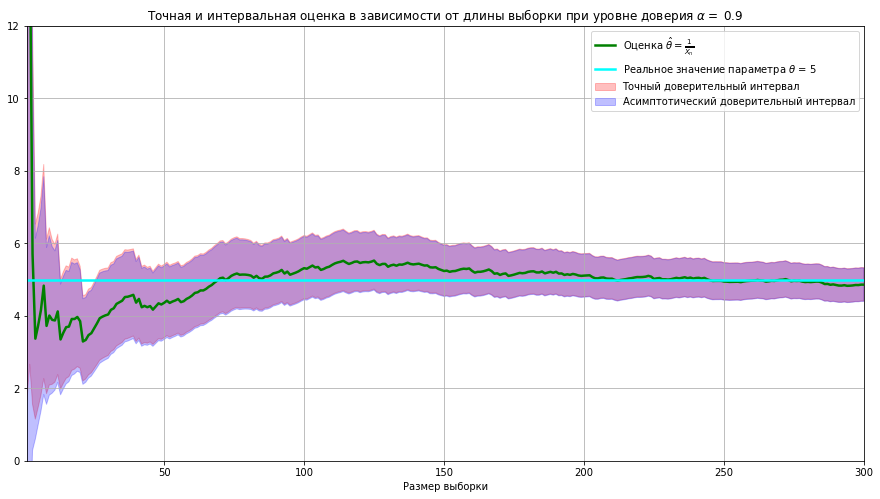

In [63]:


time = np.arange(1, k+1)
estimation = 1/(sample[0].cumsum() / time) 

plt.figure(figsize=(15, 8))
plt.plot(time, estimation, color='green', linewidth=2.5, label='Оценка $\\hat{\\theta} = \\frac{1}{\overline{X_n}}$') 


plt.fill_between(time, eci[0][:, 0], eci[0][:, 1], label = 'Точный доверительный интервал', alpha=0.25, color='red')
plt.fill_between(time, aci[0][:, 0], aci[0][:, 1], label = 'Асимптотический доверительный интервал', alpha=0.25, color='blue')
plt.plot(time, [theta for i in time], linewidth=2.5, color='cyan', label=f'Реальное значение параметра $\\theta$ = {theta}')
plt.legend()
plt.xlim((1, k))  
plt.ylim((0, 12))  
plt.xlabel('Размер выборки')
plt.title(f'Точная и интервальная оценка в зависимости от длины выборки при уровне доверия $\\alpha = $ {a}') 
plt.grid()  
plt.show()

**Вывод:**

По графику видно, что при малых размерах выборки значения оценки далеки от реального значения параметра. И, хоть и ширина интервалов довольно большая, некоторые интервалы не будут содержать в себе реального значения. По мере увеличения длины выборки, оченка начинает сходиться к параметру. И, хоть и ширина интервалов уменьшается, практически все интервалы начинают содержать реальное значение параметра.

**Общий вывод по задаче:**

В задаче мы теоретически построили точный, асимптотический и различные бутстрепные интервалы для экспоненциального распределения. Получили бутстрепную выборку оценок и  с ее помощью получили бутстрепные интервалы для выборки из экпоненциального распределения и сравнили их с точным и асимпт. интервалами. Оценили "экспериментальный" уровень доверия каждого доверительного интервала (доля попаданий значения параметра в доверительный интервал) и убедились, что он может отличаться от теоретического. Также исследовали точный и асимптотический интервалы на разных размерах выборки. По мере увеличения размера выборки ширина интервала уменьшается, но оценка сходится к параметру. Получается так, что при бОльшем размере выборки, "экспериментальный" уровень доверия должен приближаться к теоретическому.

**2)** Бонусная часть

Проведите все те же исследования для модели $N(\theta, 1)$, которая описывает многие физические эксперименты. Есть ли различия? Как вы можете их объяснить? Сделайте **выводы**.

### Задача 6.

12 баллов



Существует примета, что если перед вами дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ &mdash; неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает отсутствие связи между черным котом и неудачей, первая &mdash; что неудача происходит чаще если черный кот перебегает дорогу.

Известно, что $S = \left\{T(x) \geqslant c_\alpha\right\}$, где $T(X) = \sum\limits_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез. Это получается аналогично [примеру](https://wiki.yandex.ru/homepage/phystechdatascience-chast-1/vesna-2021/.files/examplernmk-1.pdf), разобранному на wiki. 

Чему при этом равно $c_\alpha$? Как определить p-value?

c_a = sps.binom(n, 0.5).ppf(1 - a)


p_val = sps.binom(n, 0.5).sf(W)

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$. Для этого сгенерируйте разные реализации выборок и посчитайте по ним реализации статистики.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы, можно через `pandas.DataFrame`.

*Замечание:* Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

In [276]:
N_arr = [5, 20, 50, 100, 500] 
prob_array = np.linspace(0.5, 1, 10)
a = 0.05

for p in prob_array:
    W = np.array([sps.bernoulli(p).rvs(num).sum() for num in N_arr])
    p_val = np.array([sps.binom(num, 1/2).sf(W[i] - 1) for i, num in enumerate(N_arr)])
    c_a = np.array([sps.binom(num, 1/2).ppf(1-a) for num in N_arr])
    d = {'W': W, 'p-value': p_val, 'c_a': c_a}
    df = pd.DataFrame(data=d, index=list(range(1, len(N_arr)+1)))


    print(f'For p = {round(p, 2)}')
    print(df, '\n')

For p = 0.5
     W   p-value    c_a
1    3  0.500000    4.0
2   12  0.251722   14.0
3   17  0.992327   31.0
4   49  0.617823   58.0
5  239  0.848166  268.0 

For p = 0.56
     W   p-value    c_a
1    3  0.500000    4.0
2   12  0.251722   14.0
3   31  0.059460   31.0
4   69  0.000092   58.0
5  271  0.033305  268.0 

For p = 0.61
     W       p-value    c_a
1    4  1.875000e-01    4.0
2   11  4.119015e-01   14.0
3   35  3.300224e-03   31.0
4   70  3.925070e-05   58.0
5  313  9.602696e-09  268.0 

For p = 0.67
     W       p-value    c_a
1    4  1.875000e-01    4.0
2   17  1.288414e-03   14.0
3   35  3.300224e-03   31.0
4   68  2.043886e-04   58.0
5  321  1.093022e-10  268.0 

For p = 0.72
     W       p-value    c_a
1    2  8.125000e-01    4.0
2   13  1.315880e-01   14.0
3   39  4.510745e-05   31.0
4   72  6.289575e-06   58.0
5  366  3.195751e-26  268.0 

For p = 0.78
     W       p-value    c_a
1    3  5.000000e-01    4.0
2   16  5.908966e-03   14.0
3   42  5.817779e-07   31.0
4   77  2

Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 

Для значений $p-value \leq alpha = 0.05$ при большом объеме выборки. По результатам таблицы выдно, что $p \approx 0.56$. 

Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 -- отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [207]:
N_arr = [5, 10**5]
prob_array = [0.75, 0.51]
a = 0.05

for i, (n, p) in enumerate(zip(N_arr, prob_array)):
    c_a = sps.binom(n, 0.5).ppf(1-a)
    W = sps.bernoulli(p).rvs(size=(10, n)).sum(axis = 1)
    p_val = sps.binom(n, 0.5).sf(W-1)
    d = {'W': W, 'p-value': p_val, 'c_a': c_a, 'rejected': (W>=c_a)+0} # +0 to convert bool array to int array
    df = pd.DataFrame(data=d, index = list(range(1, 11)))
    print(f'For n = {n}, p = {p}:')
    print(df)
    print('================================')

For n = 5, p = 0.75:
    W  p-value  c_a  rejected
1   5  0.03125  4.0         1
2   5  0.03125  4.0         1
3   3  0.50000  4.0         0
4   4  0.18750  4.0         1
5   4  0.18750  4.0         1
6   4  0.18750  4.0         1
7   3  0.50000  4.0         0
8   4  0.18750  4.0         1
9   2  0.81250  4.0         0
10  4  0.18750  4.0         1
For n = 100000, p = 0.51:
        W       p-value      c_a  rejected
1   51449  2.553082e-20  50260.0         1
2   50984  2.479515e-10  50260.0         1
3   51132  4.137123e-13  50260.0         1
4   51189  2.800620e-14  50260.0         1
5   50920  3.021062e-09  50260.0         1
6   50909  4.568646e-09  50260.0         1
7   51028  4.050747e-11  50260.0         1
8   50890  9.230602e-09  50260.0         1
9   50977  3.284814e-10  50260.0         1
10  50945  1.159553e-09  50260.0         1


**Вывод:**

p-value хорошо работает на больших выборках. Там лучше пользоваться им. На малых выборках по другому. На малых выборках лучше ориентироваться по критерию. 

На малых выборках решение, отвергнуть выборку или нет носят более случайный характер. На больших же выборках из-за очень большого значения c_a мы будем всегда отвергать гипотезу. Надо найти оптимальный размер выборки.

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05. По оси $x$ должно быть значение $p$, по оси $y$ &mdash; значение мощности критерия при данном параметре. Мощность считается аналитически, аналогично примеру на wiki. Обратите внимание, что текущая задача немного отличается от примера. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

Оптимальный размер выборки n = 407. Мощность критерия при таком размере выборки равна 0.79992


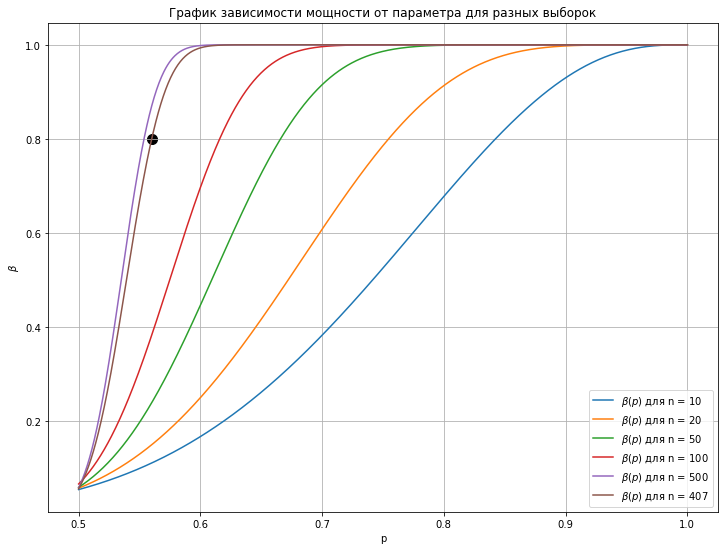

In [299]:
N_arr = [10, 20, 50, 100, 500] 
prob_array = np.linspace(0.5, 1, 1000)
a = 0.05
p0 = 0.56
b = 0.8
plt.figure(figsize=(12, 9))
plt.title('График зависимости мощности от параметра для разных выборок')
plt.grid(True)

for n in N_arr:
    c_a = sps.binom(n, 1/2).ppf(1-a)
    beta = sps.binom(n, prob_array).sf(c_a-1)
    plt.xlabel('p')
    plt.ylabel('$\\beta$')

    plt.plot(prob_array, beta, label = '$\\beta(p)$' + f' для n = {n}')
    plt.legend()

def _is_near(x, a, epsilon):
    return abs(x-a) < epsilon
    
for n in range(250, 1000):
    c_a = sps.binom(n, 1/2).ppf(1-a)
    beta = sps.binom(n, p0).sf(c_a-1)
    if _is_near(beta, b, 0.001):
        n0 = n
        print(f'Оптимальный размер выборки n = {n}. Мощность критерия при таком размере выборки равна {round(beta, 5)}')
        break

c_a = sps.binom(n0, 1/2).ppf(1-a)
beta = sps.binom(n0, prob_array).sf(c_a-1)
plt.plot(prob_array, beta, label = '$\\beta(p)$' + f' для n = {n0}')
plt.scatter([p0], [b], marker='o', s=100, color='black')
plt.legend()
plt.show()

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.

In [257]:
p0 = 0.57
p1 = 0.52 
p2 = 0.6
k = 1000
a = 0.05
c_a = sps.binom(n0, 1/2).ppf(1-a)
samples = [sps.bernoulli(p1).rvs(size = (k, n0)), sps.bernoulli(p2).rvs(size = (k, n0))]
prob_array = [p1, p2]


for p, sample in zip(prob_array, samples):
    W = sample.sum(axis = 1)
    p_val = sps.binom(n_, 0.5).sf(w-1)
    d = {'W': W, 'p-value': p_val, 'c_a': c_a, 'rejected': (W>=c_a)+0}
    df = pd.DataFrame(data=d, index=list(range(1, k+1)))
    print(f'При p = {p} вероятность отвергнуть гипотезу равна {df["rejected"].mean()}')


При p = 0.52 вероятность отвергнуть гипотезу равна 0.224
При p = 0.6 вероятность отвергнуть гипотезу равна 0.996


**Вывод:**

Подобрав существенное значение p0, нашли оптимальный размер выборки n0 для отвержения гипотезы, при котором нет случаности и не происходит постоянных отвержений из-за переобученности модели. Такое значение n0 не будет отвергать гипотезу, если p лежит от 0.5 до 0.56, и  будет "чувствителен" к значениям p>0.56.